The purposes of this notebook are:

* Analyze data from california housing dataset with plots and on interactives Leaflet.js maps using Folium.
* Employment of Auto machine learning tool TPOT to optimize the regressor used to predict house prices. In this case the resulting pipeline of TPOT proposes a XGBoost Regressor which is implemented later.

It is possible to interact with the maps of this jupyter notebook using nbviewer in the following link:

http://nbviewer.jupyter.org/github/alvertogit/datascience/blob/master/Geospatial%20analysis%20TPOT%20XGBoost%20california%20housing.ipynb


**Data Set Characteristics:**

Number of Instances: 20640

Number of Attributes: 8 numeric, predictive attributes and the target

Attribute Information:
- MedInc        median income in block
- HouseAge      median house age in block
- AveRooms      average number of rooms
- AveBedrms     average number of bedrooms
- Population    block population
- AveOccup      average house occupancy
- Latitude      house block latitude
- Longitude     house block longitude

Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/
The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S.

Census Bureau publishes sample data (a block group typically has a population\nof 600 to 3,000 people).

References
- Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,Statistics and Probability Letters, 33 (1997) 291-297

In [1]:
import folium  # interactive map
import matplotlib.pyplot as plt  # plotting
import numpy as np  # linear algebra, arrays
import pandas as pd  # data structures
import pickle
import seaborn as sns  # statistical data visualization
import xgboost as xgb  # extreme gradient boosting
from sklearn import metrics
from sklearn.datasets import fetch_california_housing  # california housing dataset
from tpot import TPOTRegressor

/.venv/lib/python3.12/site-packages/stopit/__init__.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
dataset = fetch_california_housing()

In [3]:
feature_names = dataset.feature_names
print(feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Split data into training (75%) and testing (25%)

In [4]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=4
)

**Data analysis**

In [5]:
print(train_features.shape)
print(train_labels.shape)

(15480, 8)
(15480,)


In [6]:
print(f"Train labels range: {min(train_labels)} - {max(train_labels)}")

Train labels range: 0.14999 - 5.00001


In [7]:
print(test_features.shape)
print(test_labels.shape)

(5160, 8)
(5160,)


House distribution based on location

<Figure size 1000x1000 with 0 Axes>

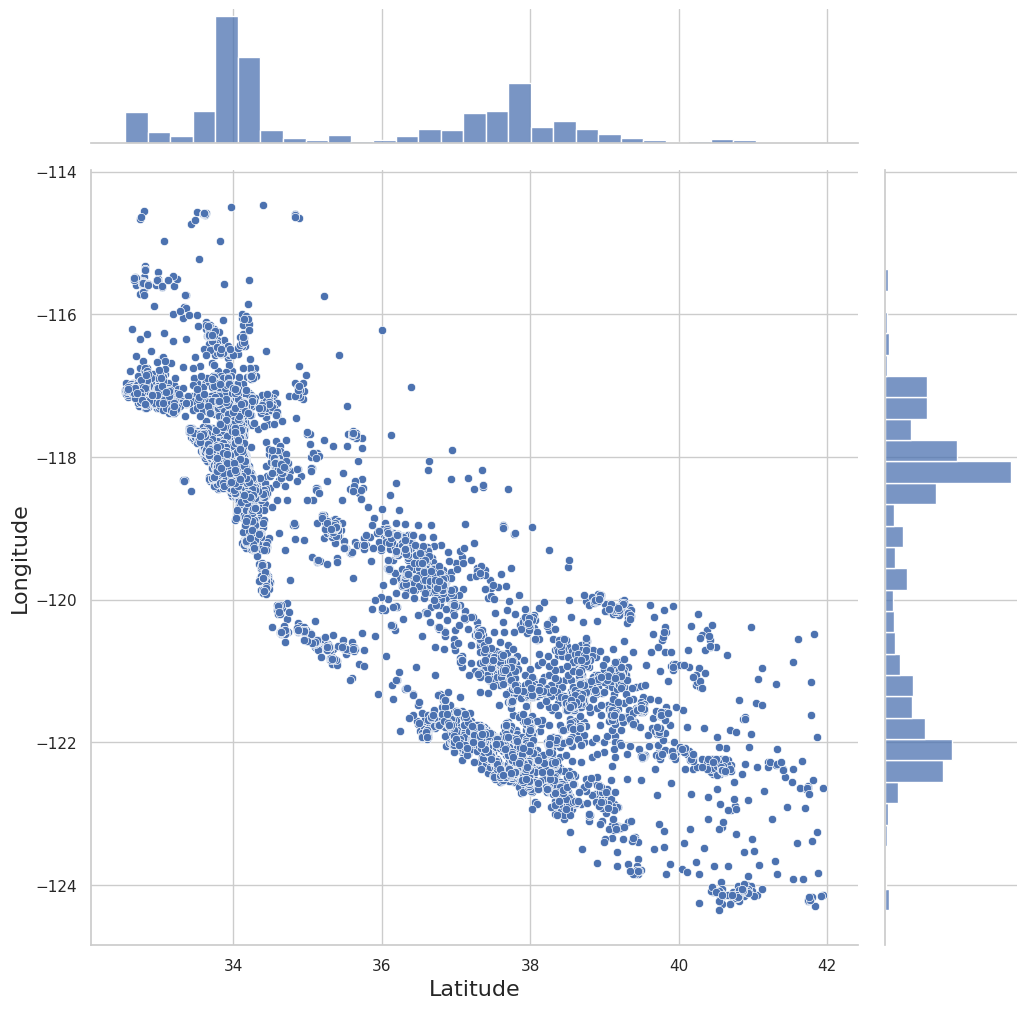

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
sns.jointplot(x=train_features[:, 6], y=train_features[:, 7], height=10)
plt.ylabel("Longitude", fontsize=16)
plt.xlabel("Latitude", fontsize=16)
plt.show()

Interactive heatmap with folium needs some data preparation

In [9]:
heat_data = [[train_features[i][6], train_features[i][7]] for i in range(len(train_features))]

California housing interactive heatmap based on location

In [10]:
from folium.plugins import HeatMap

california_heat_map = folium.Map([37, -120], tiles="OpenStreetMap", zoom_start=6)

HeatMap(heat_data, radius=14).add_to(california_heat_map)

california_heat_map

Housing analysis based on location, price and population (circles radius)

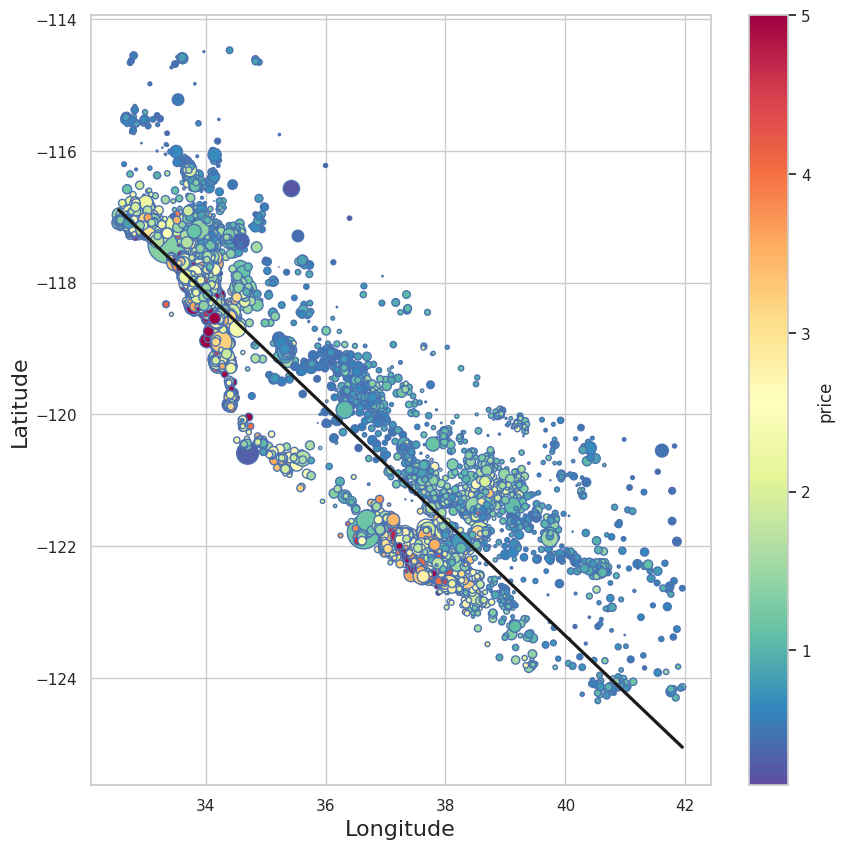

In [11]:
plt.figure(figsize=(10, 10))
points = plt.scatter(
    x=train_features[:, 6],
    y=train_features[:, 7],
    s=train_features[:, 4] / 50,
    c=train_labels,
    cmap="Spectral_r",
    edgecolors="b",
)  # set style options

plt.colorbar(points, label="price")  # add a color bar
sns.regplot(x=train_features[:, 6], y=train_features[:, 7], scatter=False, color=".1")
plt.ylabel("Latitude", fontsize=16)
plt.xlabel("Longitude", fontsize=16)
plt.show()

Interactive housing map for 1000 train samples using circles

Color circles go from blue (lower prices) to red (higher prices)

In [12]:
train_labels_color = pd.cut(
    train_labels, bins=5, labels=["blue", "green", "yellow", "orange", "red"]
)

Circles properties provide additional information for price (color) and population (radius)

In [13]:
california_prices_map = folium.Map([36, -120], tiles="Cartodb Positron", zoom_start=7)

# create feature group
fg = folium.FeatureGroup(name="housing locations")

# drawing 1000 samples
for i in range(1000):
    my_Circle = folium.CircleMarker(
        location=[train_features[i][6], train_features[i][7]],
        radius=train_features[i][4] / 400,
        fill=True,
        color=train_labels_color[i],
        fill_opacity=0.7,
    )
    fg.add_child(my_Circle)

california_prices_map.add_child(fg)

Population and coast proximity affect prices

Employ TPOT for Auto machine learning to optimize pipeline using genetic programming

In [14]:
tpot = TPOTRegressor(
    search_space="linear",
    generations=5,
    population_size=50,
    max_time_mins=5,
    max_eval_time_mins=2,
    verbose=2,
    n_jobs=2,
)  # 2 CPU cores, -1 all cores
tpot.fit(train_features, train_labels)

/.venv/lib/python3.12/site-packages/tpot/tpot_estimator/estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
Generation:   0%|                                         | 0/5 [00:00<?, ?it/s]/.venv/lib/python3.12/site-packages/stopit/__init__.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/.venv/lib/python3.12/site-packages/stopit/__init__.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools

,search_space,<tpot.search_...x74e85fc46030>
,scorers,['neg_mean_squared_error']
,scorers_weights,[1]
,cv,10
,other_objective_functions,[]
,other_objective_functions_weights,[]
,objective_function_names,None
,bigger_is_better,True
,categorical_features,None
,memory,None
,preprocessing,False


Calculate pipeline score

In [15]:
print(tpot.scorers)

['neg_mean_squared_error']


In [16]:
scorer = metrics.get_scorer('neg_mean_squared_error')
print(scorer(tpot, test_features, test_labels))

-0.48381060884801613


It is negative because for regression scoring tpot uses 'neg_mean_squared_error'

Tpot pipeline

In [17]:
tpot.fitted_pipeline_

,steps,"[('maxabsscaler', ...), ('selectfwe', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,score_func,<function f_c...x74e86b3df1a0>
,alpha,0.0039872467209
,transformer_list,"[('skiptransformer', ...), ('passthrough', ...)]"
,n_jobs,None
,transformer_weights,None
,verbose,False


Export tpot pipeline to a file

In [18]:
pickle.dump(tpot.fitted_pipeline_, open('tpot_model.pkl','wb'))

In [19]:
model = pickle.load(open('tpot_model.pkl','rb'))

Wrap train and test features into dataframes to have available feature column names

In [20]:
train_features_df = pd.DataFrame(train_features, columns=feature_names)
test_features_df = pd.DataFrame(test_features, columns=feature_names)

Fit model

In [21]:
model.fit(train_features_df, train_labels)

,steps,"[('maxabsscaler', ...), ('selectfwe', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,score_func,<function f_c...x74e86b3df1a0>
,alpha,0.0039872467209
,transformer_list,"[('skiptransformer', ...), ('passthrough', ...)]"
,n_jobs,None
,transformer_weights,None
,verbose,False


Get predictions for test dataset

In [22]:
predictions = model.predict(test_features_df)

In [23]:
predictions[:10]

array([2.21285506, 2.51732814, 1.21820141, 1.30240405, 3.25556025,
       0.78760299, 2.06264158, 3.61742378, 1.67342077, 1.99893857])

In [24]:
test_labels[:10]

array([1.752  , 3.147  , 0.9    , 1.231  , 3.509  , 0.873  , 2.127  ,
       5.00001, 1.375  , 1.107  ])

Calculate model mean squared error for test dataset

In [25]:
np.sqrt(metrics.mean_squared_error(predictions, test_labels))

np.float64(0.6947891889448105)